<a href="https://colab.research.google.com/github/BuiDaoGiaHuy/CS114.K21/blob/master/Predicting_houses_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading & exploring house sale data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sales=pd.read_csv('home_data.csv')

In [0]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


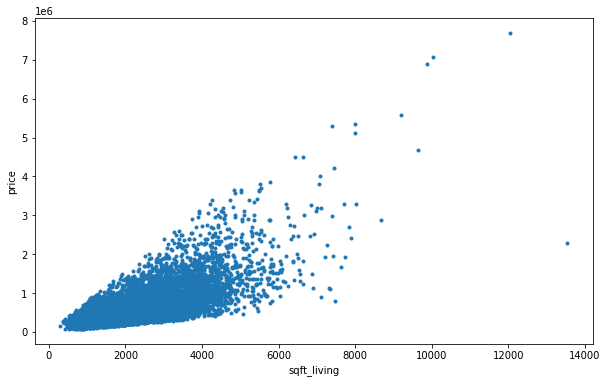

In [0]:
plt.figure(figsize=(10,6))
plt.plot(sales["sqft_living"],sales["price"],'.')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

Splitting the data into training and test sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sales['sqft_living'], sales['price'], test_size=0.2, random_state=0)
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

Build the regression model

In [41]:
sqft_model=LinearRegression()
sqft_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluate the simple model

In [42]:
mean_squared_error(y_test, sqft_model.predict(X_test), squared=False)

248879.06143647005

Visualizing predictions of simple model with Matplotlib

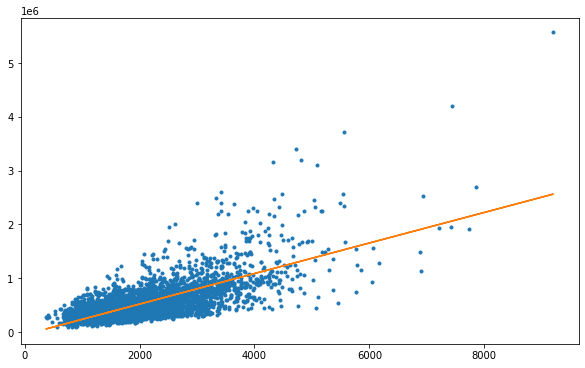

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, '.', X_test, sqft_model.predict(X_test), '-')
plt.show()

In [0]:
sqft_model.coef_

array([[283.96855737]])

In [0]:
sqft_model.intercept_

array([-48257.06345556])

In [0]:
my_features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
sales[my_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


In [0]:
[sales[i].value_counts() for i in my_features]

[3     9824
 4     6882
 2     2760
 5     1601
 6      272
 1      199
 7       38
 8       13
 0       13
 9        6
 10       3
 11       1
 33       1
 Name: bedrooms, dtype: int64, 2.50    5380
 1.00    3852
 1.75    3048
 2.25    2047
 2.00    1930
 1.50    1446
 2.75    1185
 3.00     753
 3.50     731
 3.25     589
 3.75     155
 4.00     136
 4.50     100
 4.25      79
 0.75      72
 4.75      23
 5.00      21
 5.25      13
 0.00      10
 5.50      10
 1.25       9
 6.00       6
 0.50       4
 5.75       4
 8.00       2
 6.25       2
 6.50       2
 6.75       2
 7.50       1
 7.75       1
 Name: bathrooms, dtype: int64, 1300    138
 1400    135
 1440    133
 1010    129
 1660    129
        ... 
 3001      1
 4970      1
 2905      1
 2793      1
 1975      1
 Name: sqft_living, Length: 1038, dtype: int64, 5000     358
 6000     290
 4000     251
 7200     220
 4800     120
         ... 
 38884      1
 17313      1
 35752      1
 937        1
 14321      1
 Name: sqft_lot, Le

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sales[my_features], sales['price'], test_size=0.2, random_state=0)


In [54]:
my_features_model=LinearRegression()
my_features_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
mean_squared_error(y_test, my_features_model.predict(X_test), squared=False)

244004.77443104176

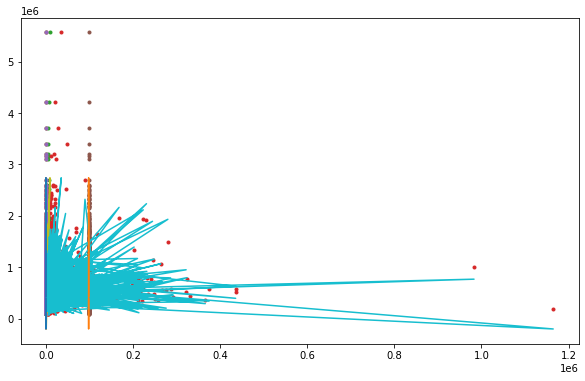

In [60]:
plt.figure(figsize=(10,6))
plt.plot(X_test, y_test, '.', X_test, my_features_model.predict(X_test), '-')
plt.show()